# Lista 4 - SVM

### Disciplina: Aprendizado de Máquina
### Professor: César Lincoln Cavalcante Mattos
### Período: 2022.1
### Aluna: Nathália Cavalcanti Martins

### Questão 1: Considere o conjunto de dados parcial disponível em enron_spam_data_prep.csv, organizado em 1001 colunas, sendo as 1000 primeiras colunas atributos textuais (codificados em TF-IDF) e a última coluna a saída. Os dados representam informações contidas em e-mails trocados internamente na empresa Enron em 2005. A saída é binária: 0, para mensagens regulares (''ham''); 1, para mensagens indesejáveis (''spam''). Maiores detalhes sobre os dados podem ser conferidos em https://github.com/MWiechmann/enron_spam_data.

### a) Considerando uma divisão de 70% dos padrões para treinamento e 30% para teste, avalie modelos de classificação binária nos dados em questão. Para tanto, use as abordagens abaixo:
**- SVM: Escolha um kernel RBF e use grid-search para ajustar os hiperparâmetros C (valores 2^-5; 2^-3; 2^-1;...; 2^11; 2^13; 2^15) e (valores 2^-15; 2^-13; 2^-11; : : : ; 2^1; 2^2; 2^3).**

Observação: Use validações cruzadas em 10 folds no interior do grid-search.

In [45]:
# Importando bibliotecas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [2]:
# Importando a base de dados:
base_dados = np.genfromtxt("enron_spam_data_prep.csv", delimiter = ',')
base_dados.shape

(33716, 1001)

In [3]:
# Separando a base entre atributos (x) e target (y):
x = base_dados[:,:-1]
y = base_dados[:,-1]

In [4]:
# Verificando o tamanho de cada:
x.shape, y.shape

((33716, 1000), (33716,))

In [10]:
# Utilizar apenas 20% dos dados
x_resto, x_svc, y_resto, y_svc = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
x_train.shape, x_svc.shape, y_train.shape, y_svc.shape

((26972, 1000), (6744, 1000), (26972,), (6744,))

In [12]:
0.2*33176

6635.200000000001

In [13]:
# dividir os dados de teste/treino conforme solicitado na lista: 0.70 - 0.30
x_train, x_test, y_train, y_test = train_test_split(x_svc, y_svc, test_size=0.3, random_state=42)

In [14]:
# Padronização
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [19]:
# Parâmetros:
C_range = [2**x for x in np.arange(-5.0,16.0,2)]
gamma_range = [2**x for x in np.arange(-15.0,4.0,2)]
C_range, gamma_range

([0.03125, 0.125, 0.5, 2.0, 8.0, 32.0, 128.0, 512.0, 2048.0, 8192.0, 32768.0],
 [3.0517578125e-05,
  0.0001220703125,
  0.00048828125,
  0.001953125,
  0.0078125,
  0.03125,
  0.125,
  0.5,
  2.0,
  8.0])

In [23]:
param_grid = dict(gamma=gamma_range, C=C_range)

In [25]:
# Modelo SVM
clf = svm.SVC(kernel='rbf')

In [26]:
# Grid Search
CV_svm = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10).fit(X_train_scaled, y_train)

In [27]:
CV_svm.cv_results_

{'mean_fit_time': array([ 9.31723204,  7.68192241,  7.00315013,  8.01228175,  8.31192048,
         8.31181741,  7.91935253,  8.76735554,  8.95121658,  8.53710845,
         7.37626071,  6.91545866,  6.20729506,  7.39524386,  7.81604724,
         7.40607593,  7.64321959,  8.86381435,  8.50802438,  8.19054325,
         6.60565984,  4.36778214,  3.79400218,  6.08284643,  7.3390312 ,
         7.45788414,  8.27677462,  8.41129367,  8.31259964, 86.51432831,
         4.1340462 ,  2.89731283,  2.90031424,  6.76133308,  7.39785318,
         8.10733926,  8.02255375,  7.965537  ,  9.06627114,  8.37517262,
         2.51605077,  1.92433815,  2.54970112,  6.88133397,  8.22602623,
         7.52888951,  7.83004124,  9.00944419,  9.49051557,  7.83038812,
         1.84898293,  1.84038317,  2.86678987,  7.44848275,  8.43772502,
         7.77436161,  7.78855345,  8.66518419,  8.07483971,  8.30038383,
         1.74640257,  1.73648818,  2.68596103,  7.21755216,  7.38378322,
         7.5023355 ,  8.00445361, 

In [29]:
# Melhores parâmetros:
CV_svm.best_params_

{'C': 8.0, 'gamma': 0.00048828125}

In [30]:
CV_svm.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.03125, 0.125, 0.5, 2.0, 8.0, 32.0, 128.0,
                               512.0, 2048.0, 8192.0, 32768.0],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2.0, 8.0]})>

In [31]:
# "Treinando" o modelo com melhores parâmetros:
clf = svm.SVC(kernel='rbf', C = 8.0, gamma = 0.00048828125).fit(X_train_scaled,y_train)

In [32]:
# Acurácia com dados de treino:
clf.score(X_train_scaled,y_train)

0.9987288135593221

### b) Para cada modelo, reporte os hiperparâmetros selecionados e as métricas de acurácia, revocação, precisão e F1-score nos dados de teste. Plote também a curva ROC e a curva Precision-Recall para cada modelo otimizado.

In [33]:
# Acurácia para os dados de teste:
pred = clf.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9688735177865613

In [34]:
# Métricas: Acurácia, Revocação, Precisão e F1-score nos dados de teste:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1011
         1.0       0.96      0.98      0.97      1013

    accuracy                           0.97      2024
   macro avg       0.97      0.97      0.97      2024
weighted avg       0.97      0.97      0.97      2024



In [35]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=8.0, gamma=0.00048828125)>

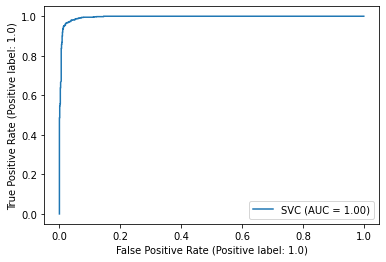

In [43]:
# Curva ROC
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test, ax=ax)

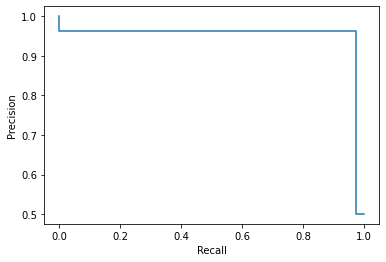

In [44]:
# Precision Recall
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()